In [1]:
# IMPORTING ALL NECESSARY LIBRARIES

import pandas as pd                #for reading & storing data, pre-processing
import numpy as np                 #for numerical computations like log,exp,sqrt etc
import matplotlib.pyplot as plt    #for visualization
#to make sure,plots are generated in Jupyter notebook itself
%matplotlib inline                 
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings 
warnings.filterwarnings("ignore")  #to ignore insignificant warnings



In [2]:
# To install the library
! pip install pmdarima

# Import the library 
from pmdarima import auto_arima

In [3]:
#Reading the data from input file
dataset = pd.read_csv('traffic_data.csv')
dataset.head()


,Month,#Number of vehicles
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset.tail() # to check if there are any null values in the end of our dataset

,Month,#Number of vehicles
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
dataset.dtypes #checking data-type

Month                  object
#Number of vehicles     int64
dtype: object

In [6]:
#Converting the dataset from month to datatime format
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True)
dataset.dtypes

Month                  datetime64[ns]
#Number of vehicles             int64
dtype: object

In [7]:
# Setting index of Month
indexedDataset = dataset.set_index(['Month'])
indexedDataset.head()

,#Number of vehicles
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


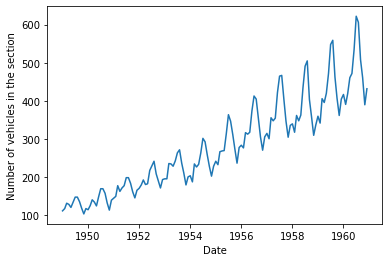

In [8]:
# Visualizing the data - by plotting graph
plt.xlabel('Date')
plt.ylabel('Number of vehicles in the section')
plt.plot(indexedDataset)

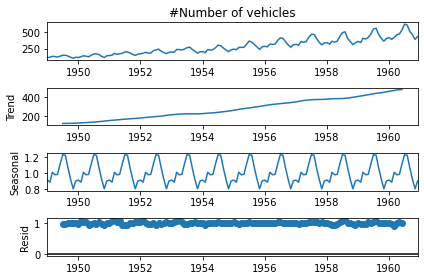

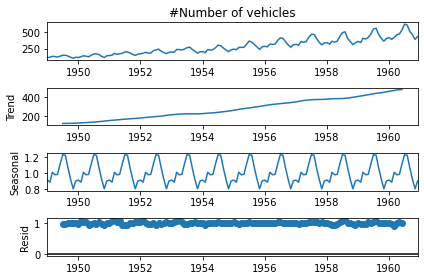

In [9]:
# ETS Decomposition (Error-Trend-Seasonality)
decomp_result = seasonal_decompose(indexedDataset['#Number of vehicles'],model ='multiplicative')

decomp_result.plot()


In [10]:
#PARAMETER ANALYSIS FOR OUR MODEL

#The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify
#the most optimal parameters for an ARIMA model and returns a fitted ARIMA model.

# Fit auto_arima function to Traffic dataset 
stepwise_modelFit = auto_arima(indexedDataset['#Number of vehicles'], start_p = 1, start_q = 1,
                               max_p = 3, max_q = 3, m = 12,
                               start_P = 0, seasonal = True, 
                               d = None, D = 1, trace = True, 
                               error_action ='ignore',    # we don't want to know if an order does not work 
                               suppress_warnings = True,  # we don't want convergence warnings 
                               stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_modelFit.summary() 



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.66 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.31 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.89 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.52 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.75 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.26 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.74 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sun, 15 Nov 2020   AIC                           1019.178
Time:                                     18:33:35   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.944      0.000      -0.507      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1910      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4481     15.527      8.402      0.000     100.017     160.880
===================================================================================
Ljung-Box (Q):                       53.71   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.07   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
# Fit ARIMA Model to Traffic dataset

# Split data into train / test sets 
train_data = indexedDataset.iloc[:len(indexedDataset)-12] # Set 11 years for training
test_data = indexedDataset.iloc[len(indexedDataset)-12:] # set 12 months( 1 year ) for testing 

# Fit SARIMAX(0, 1, 1)x(2, 1, 0, 12) on the training dataset 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train_data['#Number of vehicles'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 0, 12)) 
  
result = model.fit() 
result.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                 #Number of vehicles   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Sun, 15 Nov 2020   AIC                            901.659
Time:                                     18:33:35   BIC                            912.776
Sample:                                 01-01-1949   HQIC                           906.173
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.444      0.149      -0.052       0.343
sigma2       106.2409     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (Q):                       42.14   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.38   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

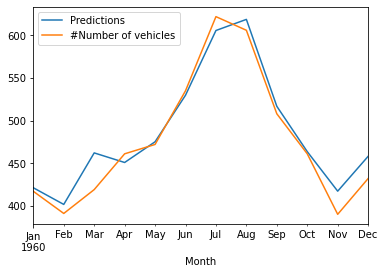

In [12]:
# Testing the predictions of the Model against the test dataset
start = len(train_data) 
end = len(train_data) + len(test_data) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test_data['#Number of vehicles'].plot(legend = True) 


In [13]:
# Calculate the MSE and RMSE for the model
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(test_data["#Number of vehicles"], predictions) 
  


18.381013709442296

In [14]:
# Calculate mean squared error 
mean_squared_error(test_data["#Number of vehicles"], predictions) 


337.86166498670565

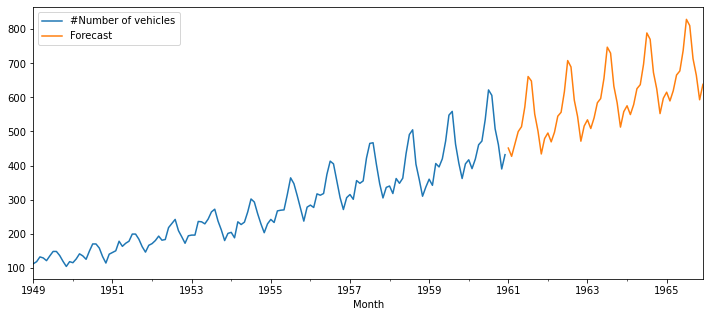

In [18]:
# Forecasting using our fit Model

# Train the model on the full dataset 
model = model = SARIMAX(indexedDataset['#Number of vehicles'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 0, 12)) 
result = model.fit() 
  
# Forecast for the next 5 years 
forecast = result.predict(start = len(indexedDataset),  
                          end = (len(indexedDataset)-1) + 5 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
indexedDataset['#Number of vehicles'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True) 


In [16]:
# Printing the forecasted traffic data
forecast



1961-01-01    451.346691
1961-02-01    427.101799
1961-03-01    463.381871
1961-04-01    499.704989
1961-05-01    514.034649
1961-06-01    571.851239
1961-07-01    661.309586
1961-08-01    648.080850
1961-09-01    551.283802
1961-10-01    501.067521
1961-11-01    434.052225
1961-12-01    479.232794
1962-01-01    495.567994
1962-02-01    469.577351
1962-03-01    497.954218
1962-04-01    544.914796
1962-05-01    556.348451
1962-06-01    616.908575
1962-07-01    708.163899
1962-08-01    689.433710
1962-09-01    592.105569
1962-10-01    544.007072
1962-11-01    471.531063
1962-12-01    516.126623
1963-01-01    534.238386
1963-02-01    508.799286
1963-03-01    539.736953
1963-04-01    584.295372
1963-05-01    596.723856
1963-06-01    655.953889
1963-07-01    747.456280
1963-08-01    729.936970
1963-09-01    632.904430
1963-10-01    583.929160
1963-11-01    512.890804
1963-12-01    558.166455
1964-01-01    575.482834
1964-02-01    549.641901
1964-03-01    578.752512
1964-04-01    625.640700
